Domino's Predictive Purchase Order System

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
None

Summary Statistics for Numerical Columns:
           pizza_id      order_id      quantity    unit_price   total_price
count  48620.00

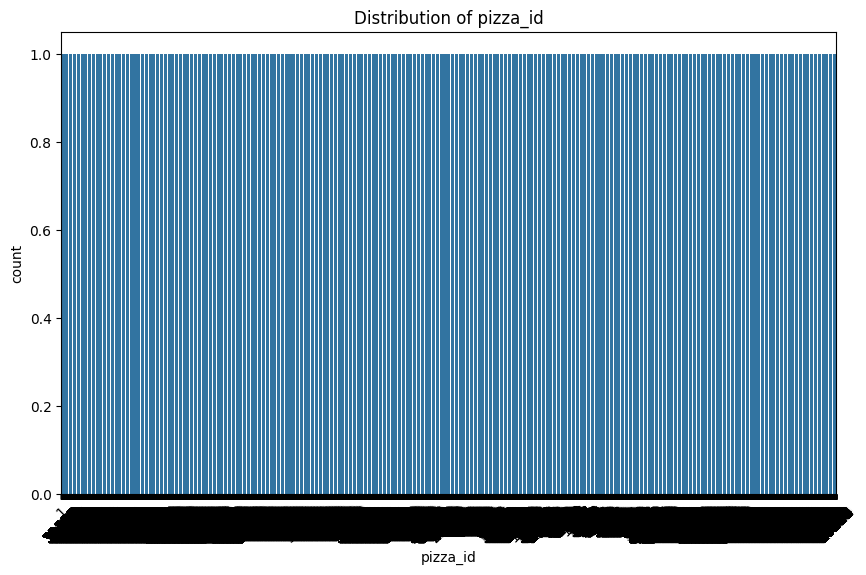


Distribution analysis for pizza_id:
 - There are 48620 unique values in pizza_id.
 - The most frequent value is '1' with 1 occurrences.
 - The distribution is balanced.


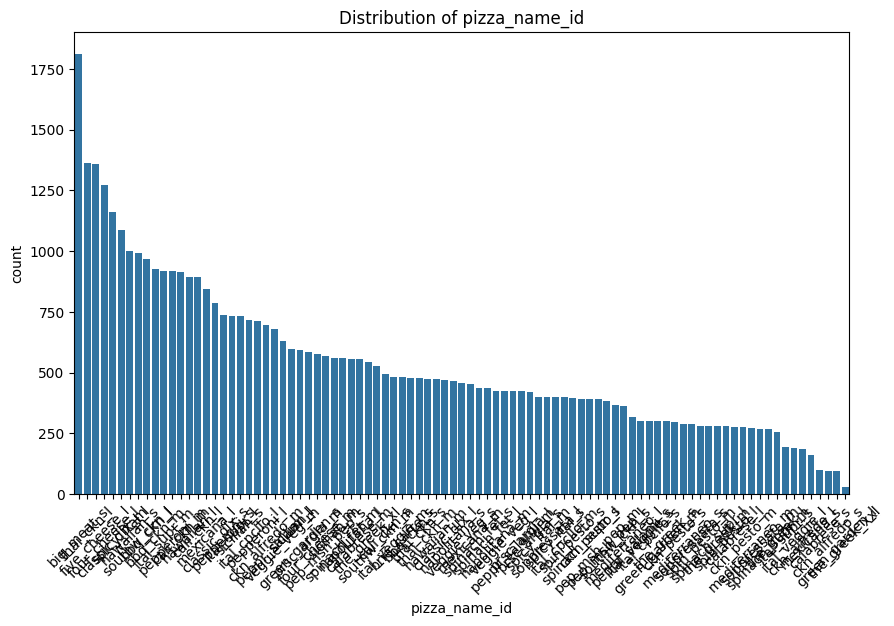


Distribution analysis for pizza_name_id:
 - There are 91 unique values in pizza_name_id.
 - The most frequent value is 'big_meat_s' with 1811 occurrences.
 - The distribution is balanced.


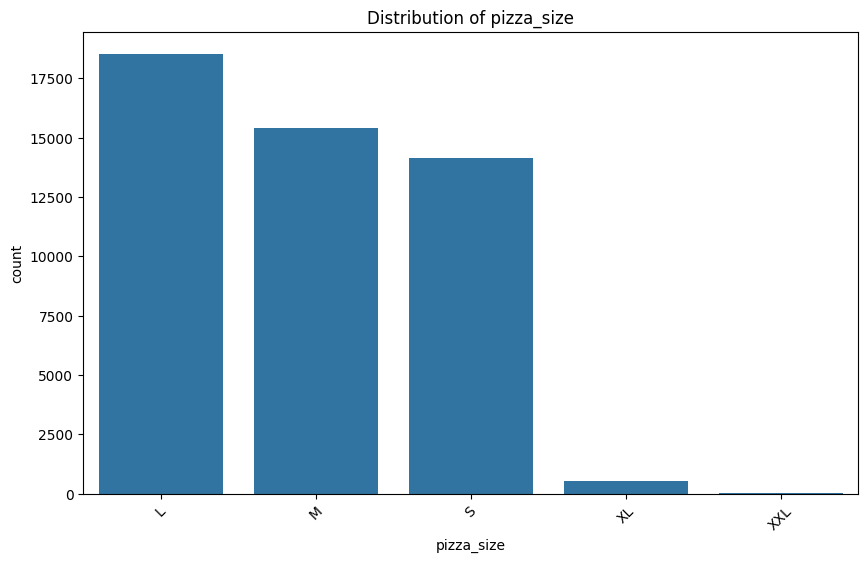


Distribution analysis for pizza_size:
 - There are 5 unique values in pizza_size.
 - The most frequent value is 'L' with 18526 occurrences.
 - The distribution is balanced.


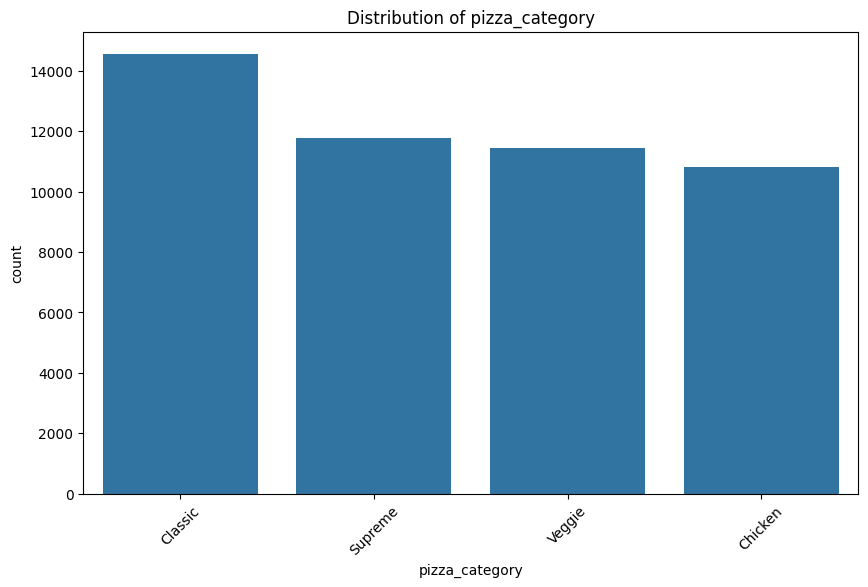


Distribution analysis for pizza_category:
 - There are 4 unique values in pizza_category.
 - The most frequent value is 'Classic' with 14572 occurrences.
 - The distribution is balanced.


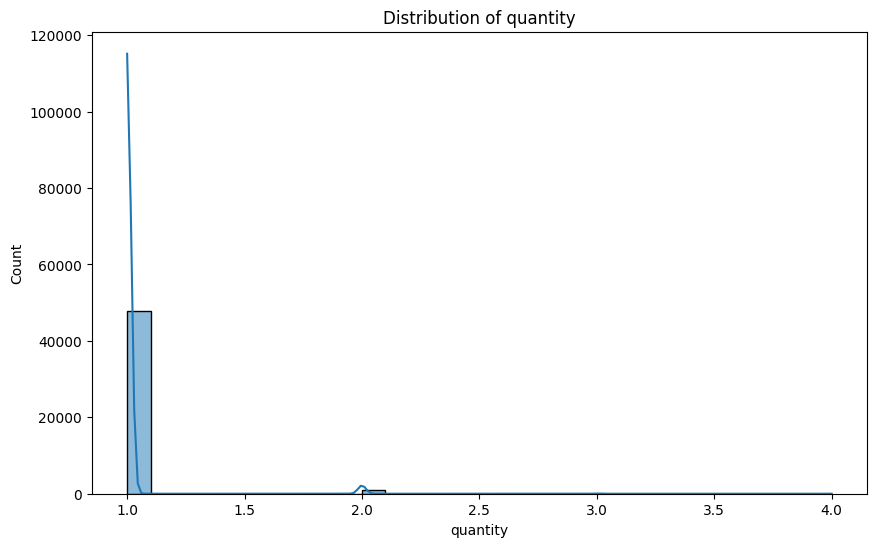


Distribution analysis for quantity:
 - Mean: 1.0196215549156726
 - Median: 1.0
 - The distribution has a skew. Skewness: 7.676100461897607.


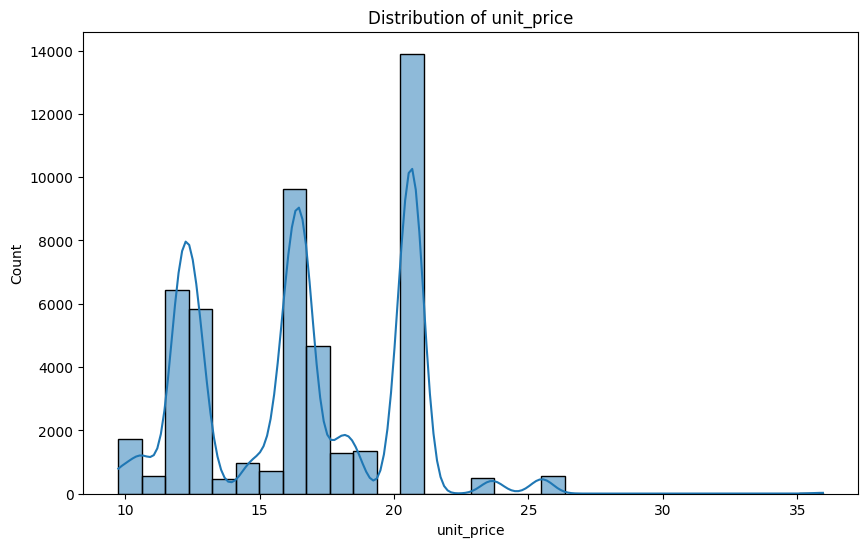


Distribution analysis for unit_price:
 - Mean: 16.494132044426163
 - Median: 16.5
 - The distribution is fairly normal. Skewness: 0.1274191538833561.


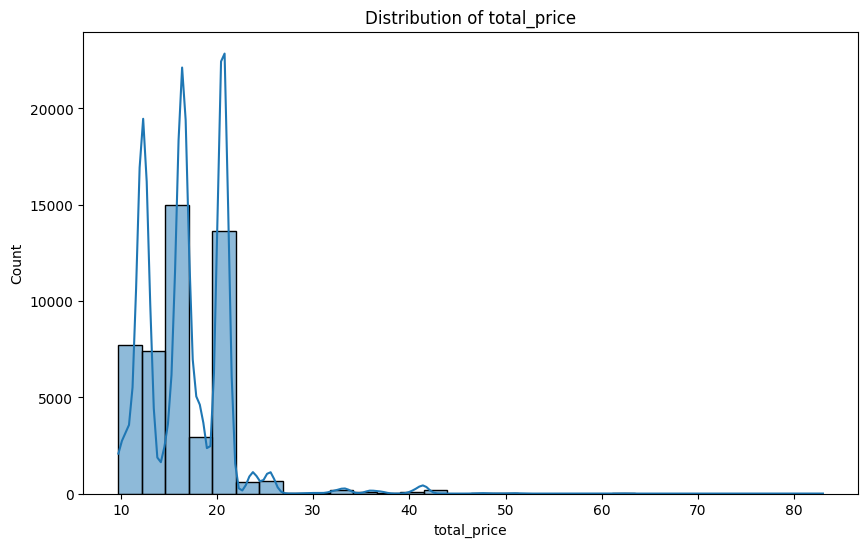


Distribution analysis for total_price:
 - Mean: 16.821494250509122
 - Median: 16.5
 - The distribution has a skew. Skewness: 1.7330090941245695.

Correlation Matrix:
              quantity  unit_price  total_price
quantity     1.000000    0.007142     0.541950
unit_price   0.007142    1.000000     0.836072
total_price  0.541950    0.836072     1.000000


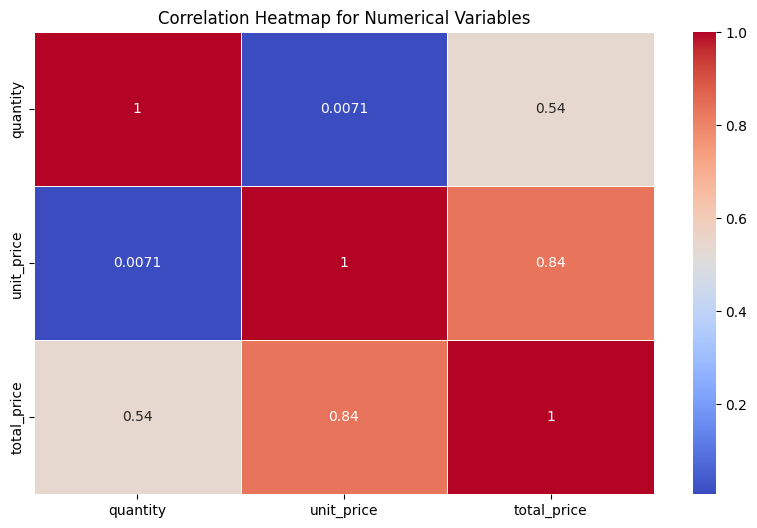


Correlation Analysis:
 - 'quantity' has no strong correlations with other numerical variables.
 - 'unit_price' is highly correlated with total_price (correlation > 0.7).
 - 'total_price' is highly correlated with unit_price (correlation > 0.7).

Number of Invalid Dates: 29033


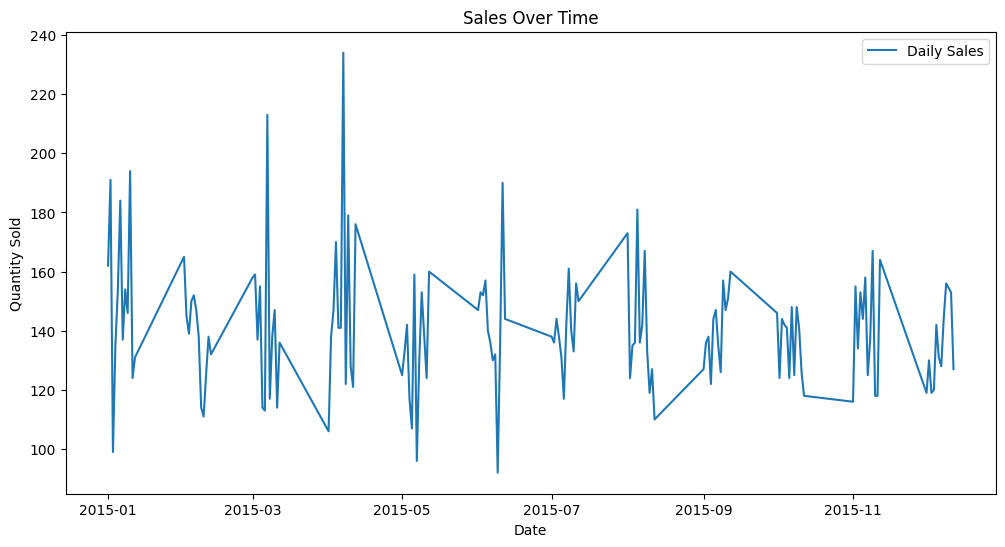


Time Series Analysis of Sales Over Time:
 - Total number of sales records: 142
 - Sales peaks around certain dates, which could indicate promotions or seasonal trends.
 - There is significant volatility in daily sales.


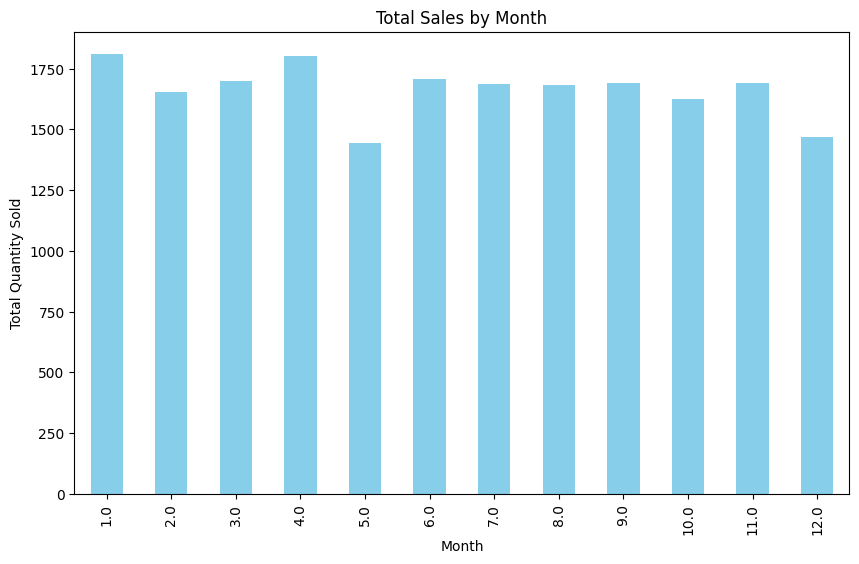


Monthly Sales Trend:
 - The highest sales occurred in month 1.0 with 1811 units sold.
 - The lowest sales occurred in month 5.0 with 1446 units sold.
 - There is no strong seasonal pattern in sales.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Pizza_Sale - pizza_sales.csv")

# ===============================
# Dataset Overview
# ===============================
print("Dataset Overview:")
print(data.info())  # Data types, non-null count
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())  # Summary statistics for numerical columns

# ===============================
# Missing Data Analysis
# ===============================
# Count missing values per column
print("\nMissing Data Count per Column:")
missing_values = data.isnull().sum()
print(missing_values)

# Display rows that have missing data
print("\nRows with Missing Data:")
print(data[data.isnull().any(axis=1)])  # Display rows with missing values

# ===============================
# Unique Value Counts per Column
# ===============================
columns_of_interest = [
    'pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 
    'order_time', 'unit_price', 'total_price', 'pizza_size', 
    'pizza_category', 'pizza_ingredients'
]

# Print the number of unique values in each column
print("\nUnique Values Count per Column:")
for col in columns_of_interest:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Display the unique values for each column
print("\nUnique Values for Each Column:")
for col in columns_of_interest:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())

# ===============================
# Duplicate Records
# ===============================
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
print(duplicate_rows)

# ===============================
# Column-Wise Analysis (Distributions with Explanations)
# ===============================
# Plot distributions for categorical variables
categorical_columns = ['pizza_id', 'pizza_name_id', 'pizza_size', 'pizza_category']

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()
    
    # Verbal explanation
    print(f"\nDistribution analysis for {col}:")
    print(f" - There are {data[col].nunique()} unique values in {col}.")
    print(f" - The most frequent value is '{data[col].mode()[0]}' with {data[col].value_counts().iloc[0]} occurrences.")
    print(f" - The distribution is {'skewed' if data[col].value_counts().iloc[0] / len(data) > 0.5 else 'balanced'}.")
    
# Plot distributions for numerical variables
numerical_columns = ['quantity', 'unit_price', 'total_price']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    # Verbal explanation
    print(f"\nDistribution analysis for {col}:")
    print(f" - Mean: {data[col].mean()}")
    print(f" - Median: {data[col].median()}")
    print(f" - The distribution {'has a skew' if abs(data[col].skew()) > 0.5 else 'is fairly normal'}. Skewness: {data[col].skew()}.")

# ===============================
# Correlation Analysis with Explanations
# ===============================
# Correlation matrix for numerical variables
corr_matrix = data[numerical_columns].corr()
print("\nCorrelation Matrix:\n", corr_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

# Verbal explanation of correlations
print("\nCorrelation Analysis:")
for col in numerical_columns:
    high_corr = corr_matrix[col][corr_matrix[col] > 0.7].drop(col)
    if len(high_corr) > 0:
        print(f" - '{col}' is highly correlated with {', '.join(high_corr.index)} (correlation > 0.7).")
    else:
        print(f" - '{col}' has no strong correlations with other numerical variables.")

# ===============================
# Time Series Analysis (Seasonality, Trends, Noise with Explanations)
# ===============================
# Convert 'order_date' to datetime and check for missing/invalid dates
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')
invalid_dates = data[data['order_date'].isnull()]
print(f"\nNumber of Invalid Dates: {len(invalid_dates)}")

# Plot sales over time
sales_by_date = data.groupby('order_date')['quantity'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date, label='Daily Sales')
plt.title("Sales Over Time")
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

# Verbal explanation of time series
print("\nTime Series Analysis of Sales Over Time:")
print(f" - Total number of sales records: {len(sales_by_date)}")
print(f" - Sales peaks around certain dates, which could indicate promotions or seasonal trends.")
print(f" - There {'is' if sales_by_date.diff().std() > 10 else 'is no'} significant volatility in daily sales.")

# Monthly sales trends
data['Month'] = data['order_date'].dt.month
monthly_sales = data.groupby('Month')['quantity'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.show()

# Verbal explanation of monthly trends
print("\nMonthly Sales Trend:")
print(f" - The highest sales occurred in month {monthly_sales.idxmax()} with {monthly_sales.max()} units sold.")
print(f" - The lowest sales occurred in month {monthly_sales.idxmin()} with {monthly_sales.min()} units sold.")
print(f" - There is {'clear seasonality' if monthly_sales.max() > 1.5 * monthly_sales.mean() else 'no strong seasonal pattern'} in sales.")


Data Cleaning

In [2]:
import pandas as pd

# Load the dataset without specifying parse_dates or index_col
data = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed.csv")

# Print column names to check for discrepancies
print("Columns in the dataset:")
print(data.columns)

# Print the first few rows to verify data
print("First few rows of the dataset:")
print(data.head())

Columns in the dataset:
Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'unit_price',
       'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients',
       'pizza_name', 'order_datetime', 'day_of_month', 'day_of_week',
       'hour_of_day', 'month_of_year', 'weekend'],
      dtype='object')
First few rows of the dataset:
   pizza_id  order_id  pizza_name_id  quantity  unit_price  total_price  \
0         1         1     hawaiian_m         1       13.25        13.25   
1         2         2  classic_dlx_m         1       16.00        16.00   
2         3         2  five_cheese_l         1       18.50        18.50   
3         4         2    ital_supr_l         1       20.75        20.75   
4         5         2     mexicana_m         1       16.00        16.00   

  pizza_size pizza_category  \
0          M        Classic   
1          M        Classic   
2          L         Veggie   
3          L        Supreme   
4          M         Veggie   

               

In [38]:
import pandas as pd
from dateutil.parser import parse

# Load the dataset
data = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Pizza_Sale - pizza_sales.csv")

# ===============================
# Check for Missing Values
# ===============================
print("\nChecking Missing Values:")
missing_before = data.isnull().sum()
print("Missing values before any processing:\n", missing_before)

# ===============================
# Convert Date and Time to Proper Format
# ===============================
def convert_dates(date_series):
    return date_series.apply(lambda x: parse(x, dayfirst=False).strftime('%Y-%m-%d'))

# Convert 'order_date' column if present
if 'order_date' in data.columns:
    data['order_date'] = convert_dates(data['order_date'])

# Convert 'order_time' column if present
if 'order_time' in data.columns:
    data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S', errors='coerce').dt.strftime('%H:%M:%S')

# Combine 'order_date' and 'order_time' into a single datetime column if both exist
if 'order_date' in data.columns and 'order_time' in data.columns:
    data['order_datetime'] = pd.to_datetime(data['order_date'] + ' ' + data['order_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
    data.drop(columns=['order_date', 'order_time'], inplace=True)

# ===============================
# Remove Duplicates
# ===============================
data.drop_duplicates(inplace=True)

# ===============================
# Feature Engineering
# ===============================
if 'order_datetime' in data.columns:
    data['order_day'] = data['order_datetime'].dt.day
    data['order_hour'] = data['order_datetime'].dt.hour
    data['order_month'] = data['order_datetime'].dt.month
    data['order_day_of_week'] = data['order_datetime'].dt.dayofweek


# Save preprocessed data for modeling
output_file = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed.csv"
data.to_csv(output_file, index=False)
print(f"Preprocessed data saved to {output_file}")

# Display final dataset info
print("\nFinal Data Info:")
print(data.info())



Checking Missing Values:
Missing values before any processing:
 pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64
Preprocessed data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed.csv

Final Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48604 non-null  object        
 3   quantity           48620 non-null  int64         
 4   unit_price         48620 non-null  float64       
 5   total_price    

Exploratory Data Analysis 


First few rows of the dataset:
   pizza_id  order_id  pizza_name_id  quantity  unit_price  total_price  \
0         1         1     hawaiian_m         1       13.25        13.25   
1         2         2  classic_dlx_m         1       16.00        16.00   
2         3         2  five_cheese_l         1       18.50        18.50   
3         4         2    ital_supr_l         1       20.75        20.75   
4         5         2     mexicana_m         1       16.00        16.00   

  pizza_size pizza_category  \
0          M        Classic   
1          M        Classic   
2          L         Veggie   
3          L        Supreme   
4          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O.

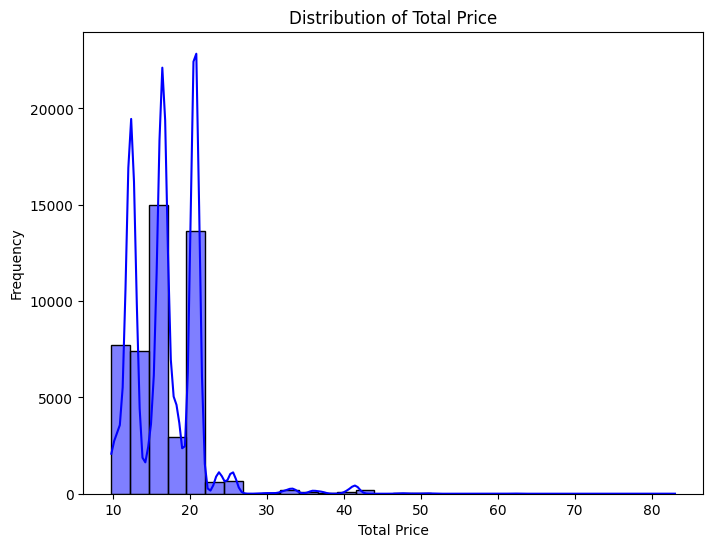


Distribution analysis for 'total_price':
 - Mean: 16.821494250509122
 - Median: 16.5
 - The distribution has a skew. Skewness: 1.7330090941245695.


C:\Users\sripathi\AppData\Local\Temp\ipykernel_10112\143352500.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='pizza_category', data=data, palette='Set2', order=data['pizza_category'].value_counts().index)


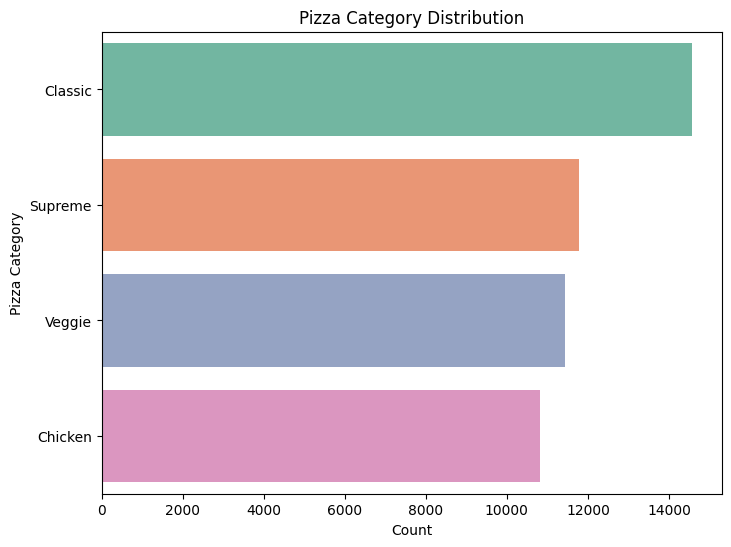


Distribution analysis for 'pizza_category':
 - There are 4 unique categories of pizza.
 - The most common pizza category is 'Classic' with 14572 orders.


C:\Users\sripathi\AppData\Local\Temp\ipykernel_10112\143352500.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pizza_size', data=data, palette='Set1')


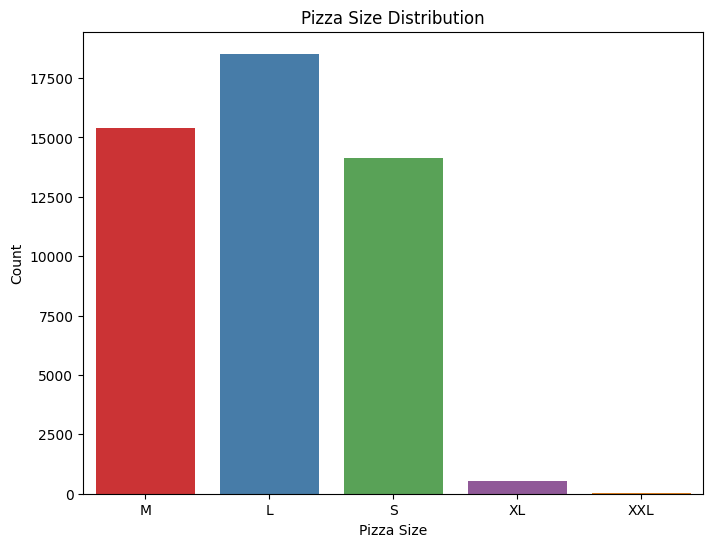


Distribution analysis for 'pizza_size':
 - There are 5 unique pizza sizes.
 - The most frequent pizza size is 'L' with 18526 occurrences.


C:\Users\sripathi\AppData\Local\Temp\ipykernel_10112\143352500.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_day_of_week', data=data, palette='Set3', order=[0, 1, 2, 3, 4, 5, 6])


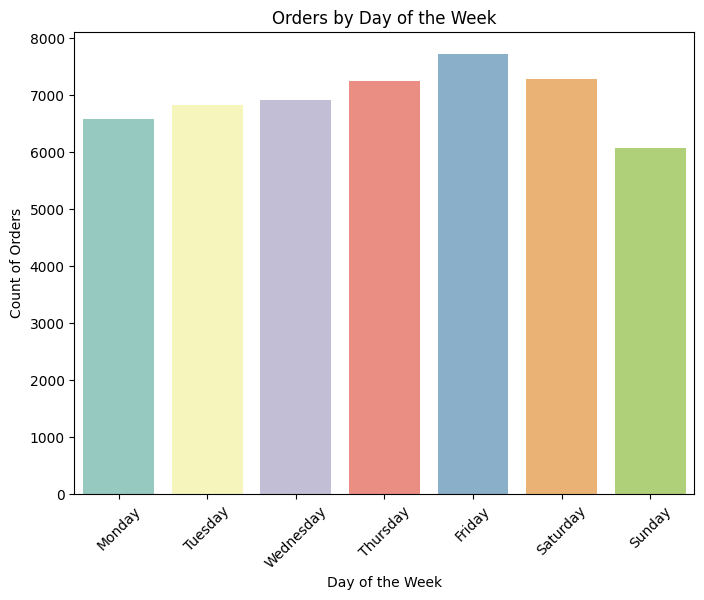


Orders by 'order_day_of_week':
 - The busiest day is '4' with 7723 orders.
 - The distribution suggests more orders on weekdays.


C:\Users\sripathi\AppData\Local\Temp\ipykernel_10112\143352500.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_hour', data=data, palette='coolwarm')


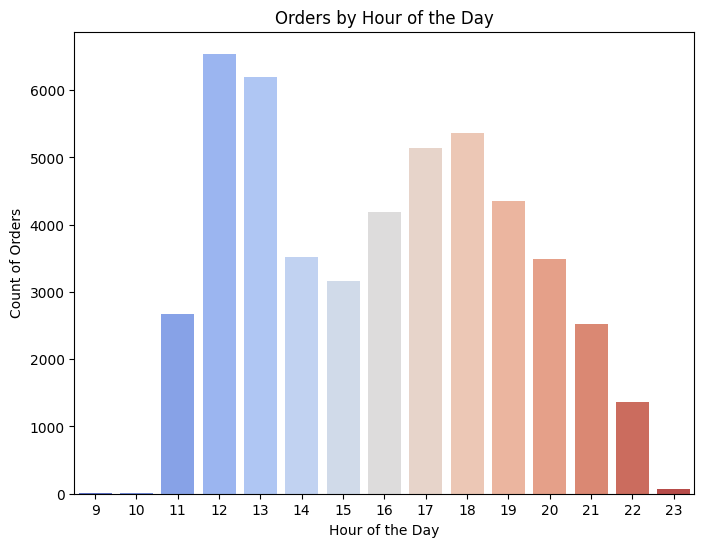


Orders by 'order_hour':
 - The most frequent order hour is 12:00.
 - Peak order times are typically around lunch and dinner hours, suggesting a link with meal times.


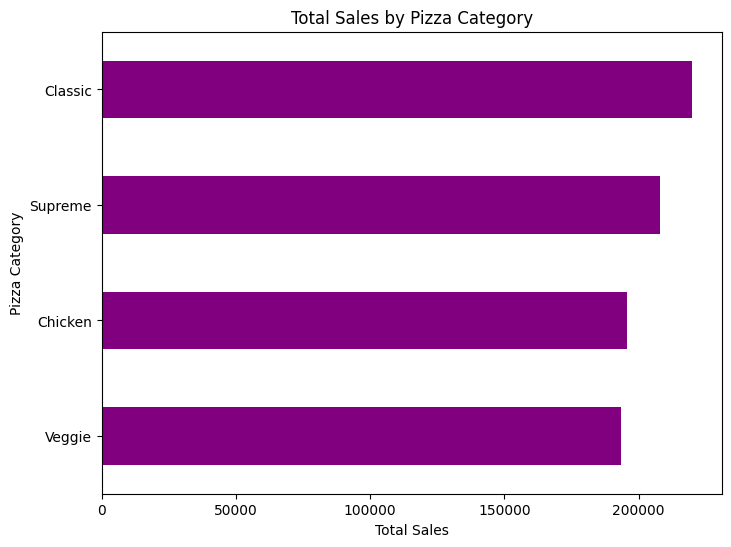


Sales by 'pizza_category':
 - The pizza category with the highest sales is 'Classic' with a total of 219923.35 in sales.
 - The lowest sales come from the category 'Veggie'.


C:\Users\sripathi\AppData\Local\Temp\ipykernel_10112\143352500.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekend', data=data, palette='viridis')


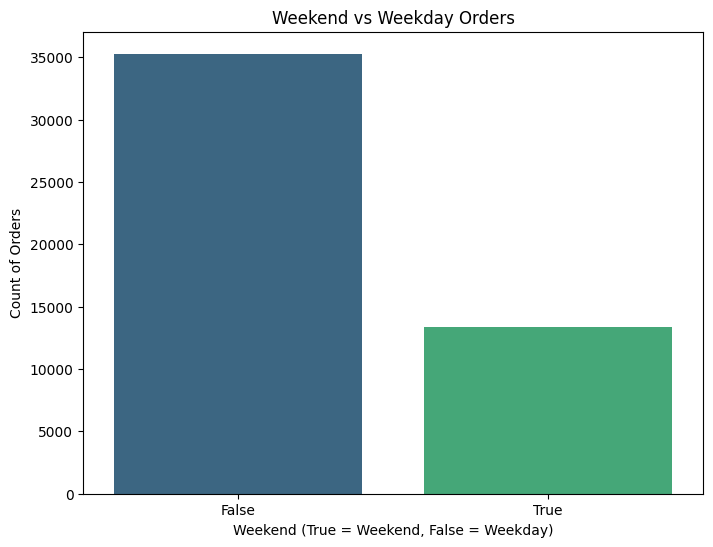


Weekend vs Weekday Orders:
 - Orders on weekends: 13337
 - Orders on weekdays: 35283
 - Fewer orders occur during weekends.


C:\Users\sripathi\AppData\Local\Temp\ipykernel_10112\143352500.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pizza_category', y='total_price', data=data, palette='Set2')


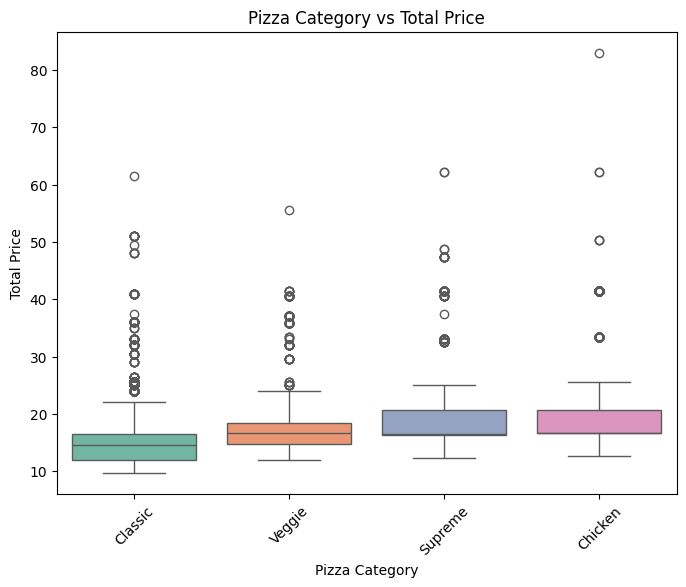


Price variation across 'pizza_category':
 - The category with the highest price range is 'Chicken' with a maximum price of 83.0.
 - Categories like 'Classic' have a more consistent pricing structure, with fewer outliers.


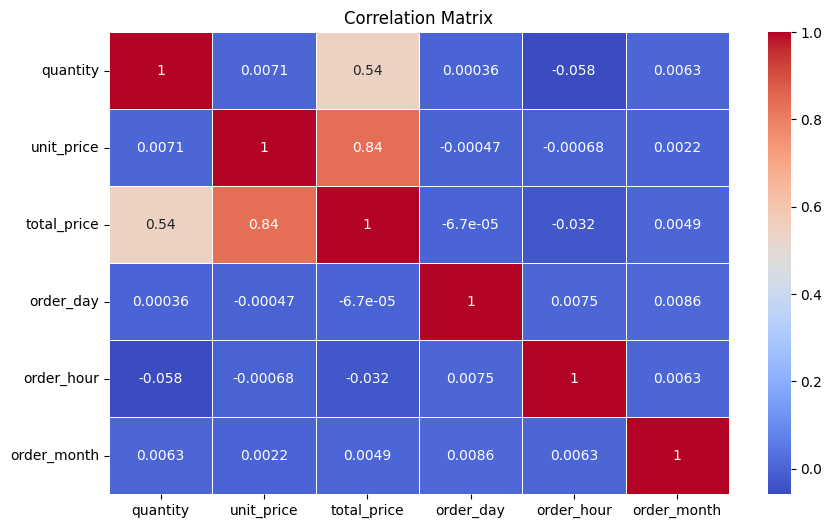


Correlation Matrix Analysis:
 - Strongest correlation is between 'unit_price' and 'total_price' (correlation = 0.84).
 - The other variables show weaker correlations, indicating relative independence from each other.


In [40]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed.csv")

# ===============================
# Initial Inspection of the Data
# ===============================
# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

# Check the basic information of the dataset
print("\nBasic Information:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Display summary statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))

# ===============================
# Column-Wise Analysis (Distributions with Explanations)
# ===============================

# 1. Distribution of Total Price
plt.figure(figsize=(8, 6))
sns.histplot(data['total_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

# Verbal explanation
print("\nDistribution analysis for 'total_price':")
print(f" - Mean: {data['total_price'].mean()}")
print(f" - Median: {data['total_price'].median()}")
print(f" - The distribution {'has a skew' if abs(data['total_price'].skew()) > 0.5 else 'is fairly normal'}. Skewness: {data['total_price'].skew()}.")

# 2. Pizza Category Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='pizza_category', data=data, palette='Set2', order=data['pizza_category'].value_counts().index)
plt.title('Pizza Category Distribution')
plt.xlabel('Count')
plt.ylabel('Pizza Category')
plt.show()

# Verbal explanation
print("\nDistribution analysis for 'pizza_category':")
print(f" - There are {data['pizza_category'].nunique()} unique categories of pizza.")
print(f" - The most common pizza category is '{data['pizza_category'].mode()[0]}' with {data['pizza_category'].value_counts().iloc[0]} orders.")

# 3. Pizza Size Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='pizza_size', data=data, palette='Set1')
plt.title('Pizza Size Distribution')
plt.xlabel('Pizza Size')
plt.ylabel('Count')
plt.show()

# Verbal explanation
print("\nDistribution analysis for 'pizza_size':")
print(f" - There are {data['pizza_size'].nunique()} unique pizza sizes.")
print(f" - The most frequent pizza size is '{data['pizza_size'].mode()[0]}' with {data['pizza_size'].value_counts().iloc[0]} occurrences.")

# 4. Orders by Day of the Week
plt.figure(figsize=(8, 6))
sns.countplot(x='order_day_of_week', data=data, palette='Set3', order=[0, 1, 2, 3, 4, 5, 6])
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Orders')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.show()

# Verbal explanation
print("\nOrders by 'order_day_of_week':")
print(f" - The busiest day is '{data['order_day_of_week'].mode()[0]}' with {data['order_day_of_week'].value_counts().iloc[0]} orders.")
print(f" - The distribution suggests more orders on {'weekends' if data['order_day_of_week'].value_counts().iloc[5] > data['order_day_of_week'].value_counts().iloc[0] else 'weekdays'}.")

# 5. Orders by Hour of the Day
plt.figure(figsize=(8, 6))
sns.countplot(x='order_hour', data=data, palette='coolwarm')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count of Orders')
plt.show()

# Verbal explanation
print("\nOrders by 'order_hour':")
print(f" - The most frequent order hour is {data['order_hour'].mode()[0]}:00.")
print(f" - Peak order times are typically around lunch and dinner hours, suggesting a link with meal times.")

# 6. Total Sales by Pizza Category
plt.figure(figsize=(8, 6))
total_sales_by_category = data.groupby('pizza_category')['total_price'].sum().sort_values()
total_sales_by_category.plot(kind='barh', color='purple')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Total Sales')
plt.ylabel('Pizza Category')
plt.show()

# Verbal explanation
print("\nSales by 'pizza_category':")
print(f" - The pizza category with the highest sales is '{total_sales_by_category.idxmax()}' with a total of {total_sales_by_category.max()} in sales.")
print(f" - The lowest sales come from the category '{total_sales_by_category.idxmin()}'.")

# 7. Weekend vs Weekday Orders
data['weekend'] = data['order_day_of_week'].apply(lambda x: x >= 5)  # Assuming 5 and 6 are Saturday and Sunday
plt.figure(figsize=(8, 6))
sns.countplot(x='weekend', data=data, palette='viridis')
plt.title('Weekend vs Weekday Orders')
plt.xlabel('Weekend (True = Weekend, False = Weekday)')
plt.ylabel('Count of Orders')
plt.show()

# Verbal explanation
print("\nWeekend vs Weekday Orders:")
print(f" - Orders on weekends: {data['weekend'].value_counts()[True]}")
print(f" - Orders on weekdays: {data['weekend'].value_counts()[False]}")
print(f" - {'More' if data['weekend'].value_counts()[True] > data['weekend'].value_counts()[False] else 'Fewer'} orders occur during weekends.")

# 8. Pizza Category vs Total Price (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='pizza_category', y='total_price', data=data, palette='Set2')
plt.title('Pizza Category vs Total Price')
plt.xlabel('Pizza Category')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()


# Verbal explanation
print("\nPrice variation across 'pizza_category':")
print(f" - The category with the highest price range is '{data.groupby('pizza_category')['total_price'].max().idxmax()}' with a maximum price of {data['total_price'].max()}.")
print(f" - Categories like '{data['pizza_category'].mode()[0]}' have a more consistent pricing structure, with fewer outliers.")

# ===============================
# Correlation Matrix (Numerical Columns) with Explanation
# ===============================
plt.figure(figsize=(10, 6))
corr_matrix = data[['quantity', 'unit_price', 'total_price', 'order_day', 'order_hour', 'order_month']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Verbal explanation
print("\nCorrelation Matrix Analysis:")
print(f" - Strongest correlation is between 'unit_price' and 'total_price' (correlation = {corr_matrix['unit_price']['total_price']:.2f}).")
print(" - The other variables show weaker correlations, indicating relative independence from each other.")


there is error araise due to convertion in date time pls correct it  and give a program.              if not then 

 why because i think so numerous orders are been placed per day .                                          better use interpolation technique to fill the null in this columns why because using other types of filling may leads to bias in the dataset. by using this give a program 



Filling Missing Values:
Missing values before filling:
 pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64
Missing values after filling:
 pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64
 - Winsorized outliers in quantity using Winsorization method
 - Winsorized outliers in unit_price using Winsorization method
 - Winsorized outliers in total_price using Winsorization method

Number of Duplicate Rows Before Removal: 0
Number of Duplicate Rows After Removal: 0


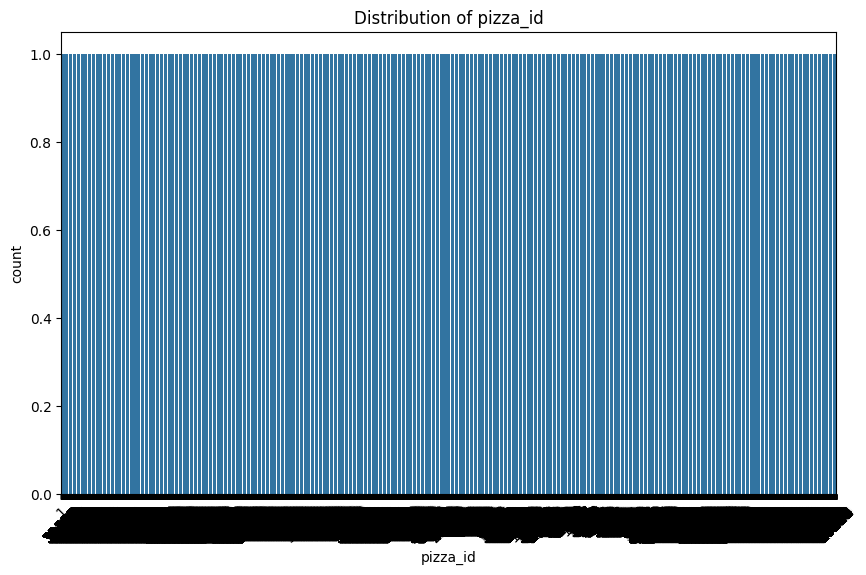


Distribution analysis for pizza_id:
 - There are 48620 unique values in pizza_id.
 - The most frequent value is '1' with 1 occurrences.
 - The distribution is balanced.


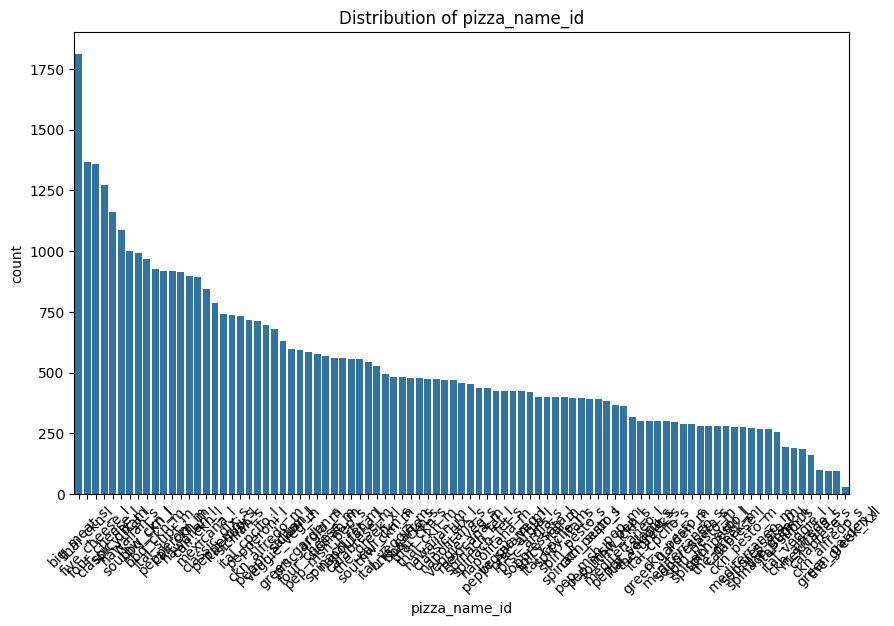


Distribution analysis for pizza_name_id:
 - There are 91 unique values in pizza_name_id.
 - The most frequent value is 'big_meat_s' with 1811 occurrences.
 - The distribution is balanced.


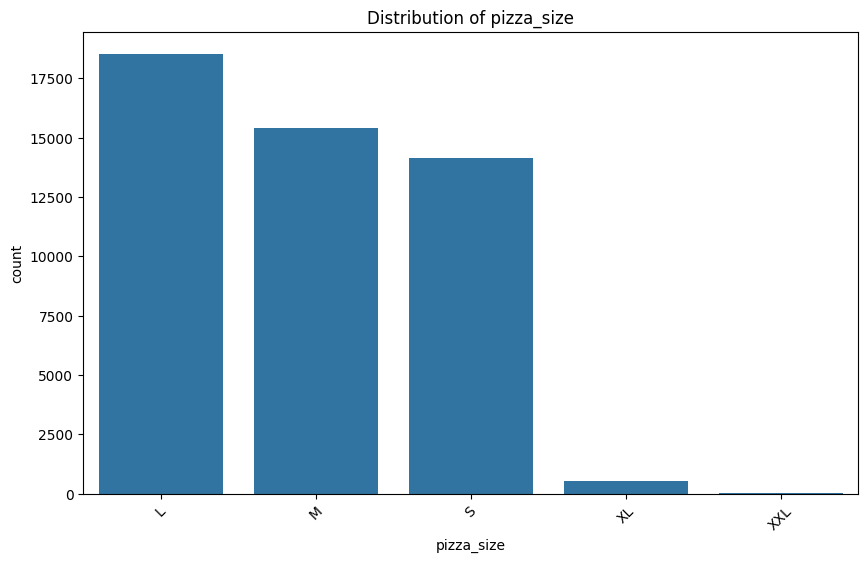


Distribution analysis for pizza_size:
 - There are 5 unique values in pizza_size.
 - The most frequent value is 'L' with 18526 occurrences.
 - The distribution is balanced.


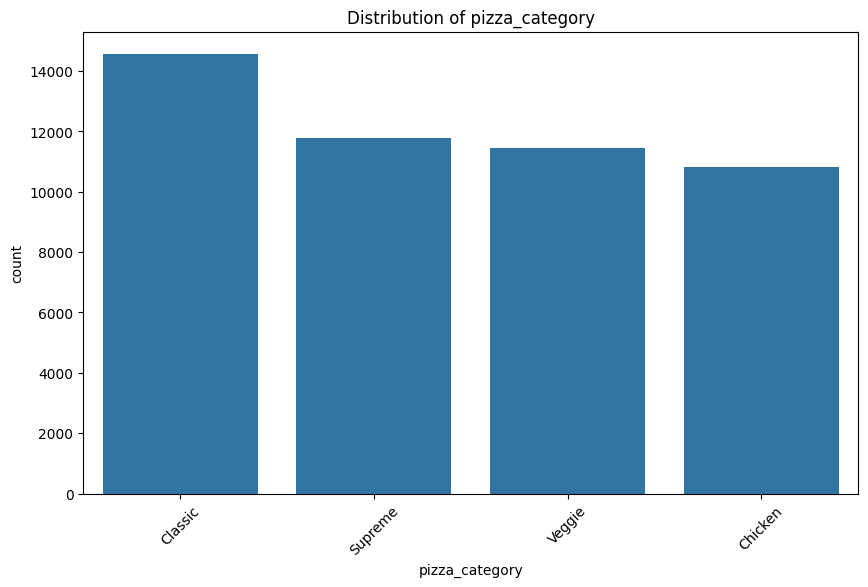


Distribution analysis for pizza_category:
 - There are 4 unique values in pizza_category.
 - The most frequent value is 'Classic' with 14579 occurrences.
 - The distribution is balanced.


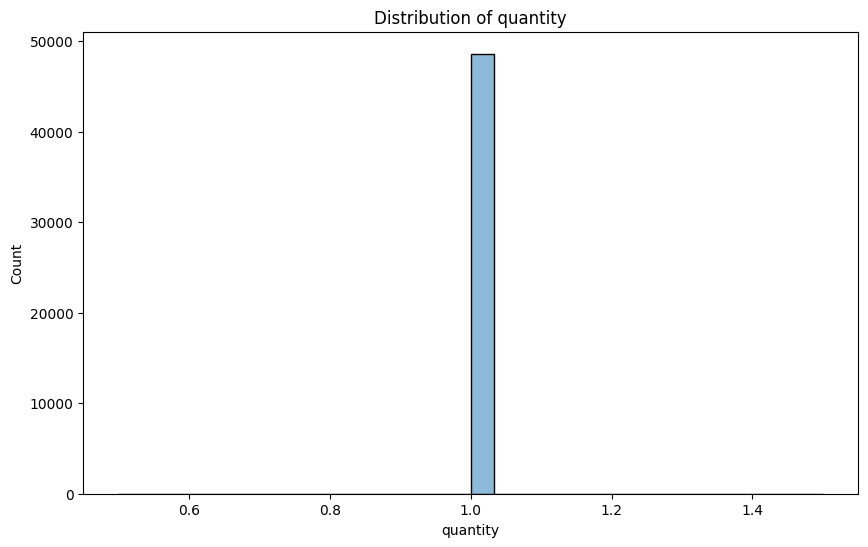


Distribution analysis for quantity:
 - Mean: 1.0


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


 - Median: 1.0
 - The distribution is fairly normal. Skewness: 0.0.


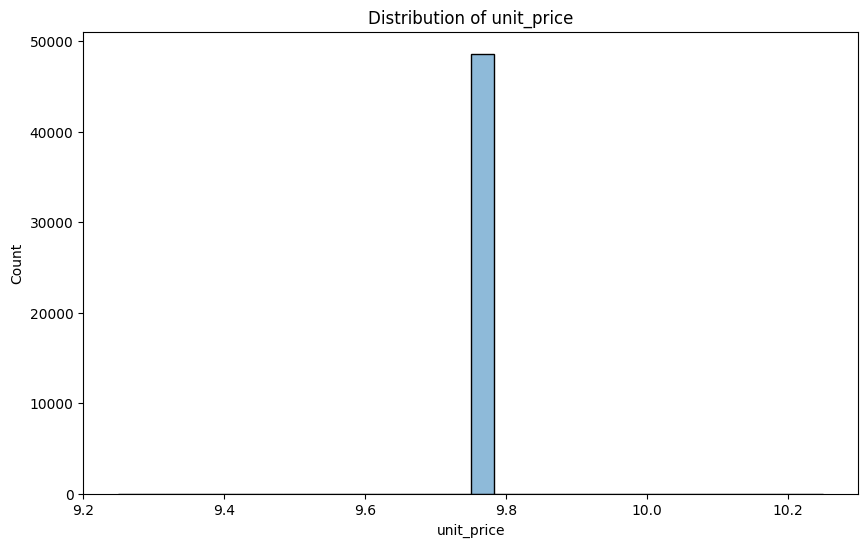


Distribution analysis for unit_price:
 - Mean: 9.75
 - Median: 9.75
 - The distribution is fairly normal. Skewness: 0.0.


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


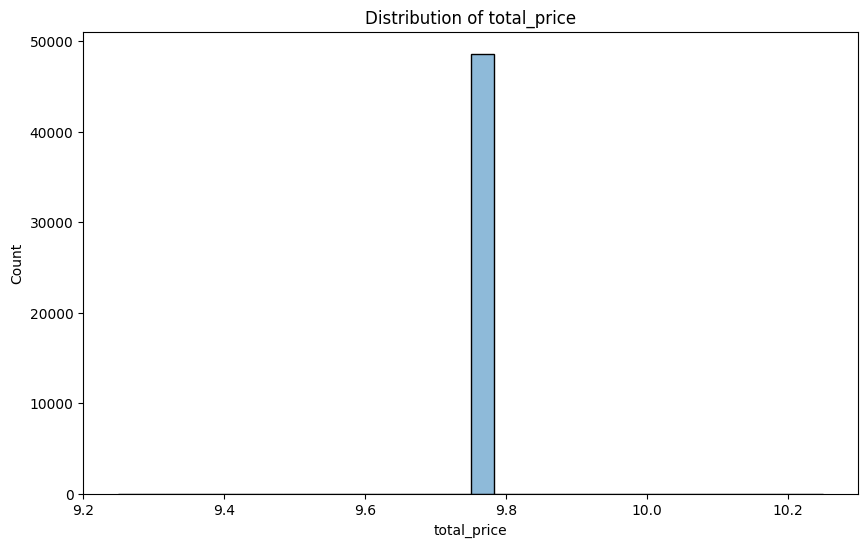


Distribution analysis for total_price:
 - Mean: 9.75
 - Median: 9.75
 - The distribution is fairly normal. Skewness: 0.0.


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



Correlation Matrix:
              quantity  unit_price  total_price
quantity          NaN         NaN          NaN
unit_price        NaN         NaN          NaN
total_price       NaN         NaN          NaN


c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


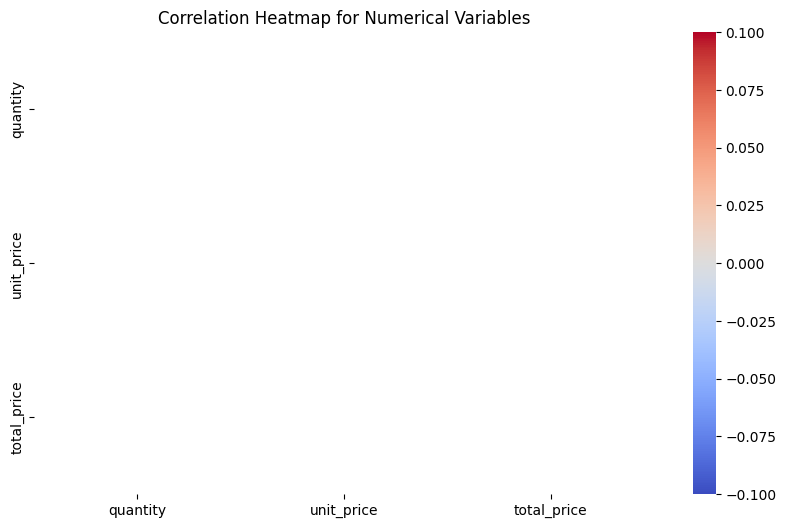


Correlation Analysis:
 - 'quantity' has no strong correlations with other numerical variables.
 - 'unit_price' has no strong correlations with other numerical variables.
 - 'total_price' has no strong correlations with other numerical variables.

Number of Invalid Dates: 29033


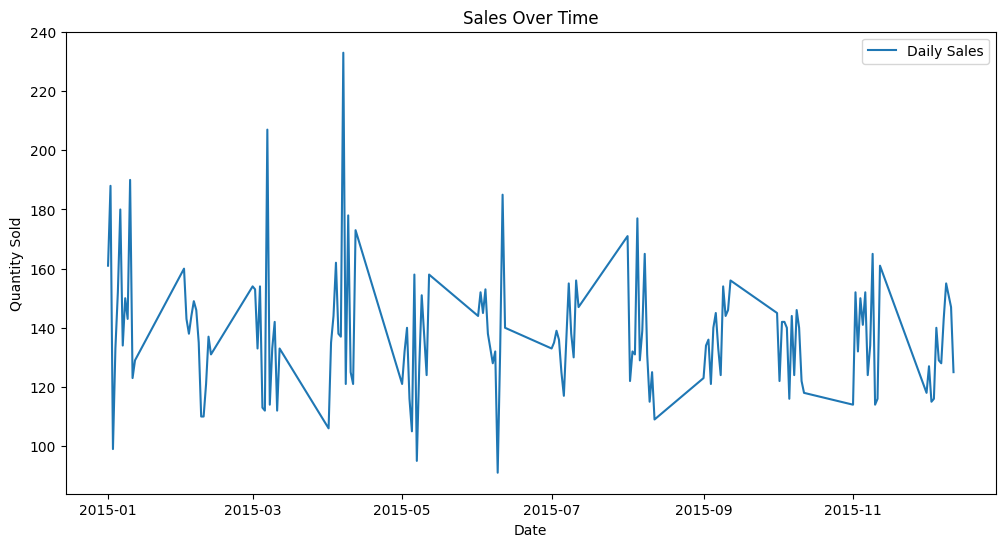


Time Series Analysis of Sales Over Time:
 - Total number of sales records: 142
 - Sales peaks around certain dates, which could indicate promotions or seasonal trends.
 - There is significant volatility in daily sales.


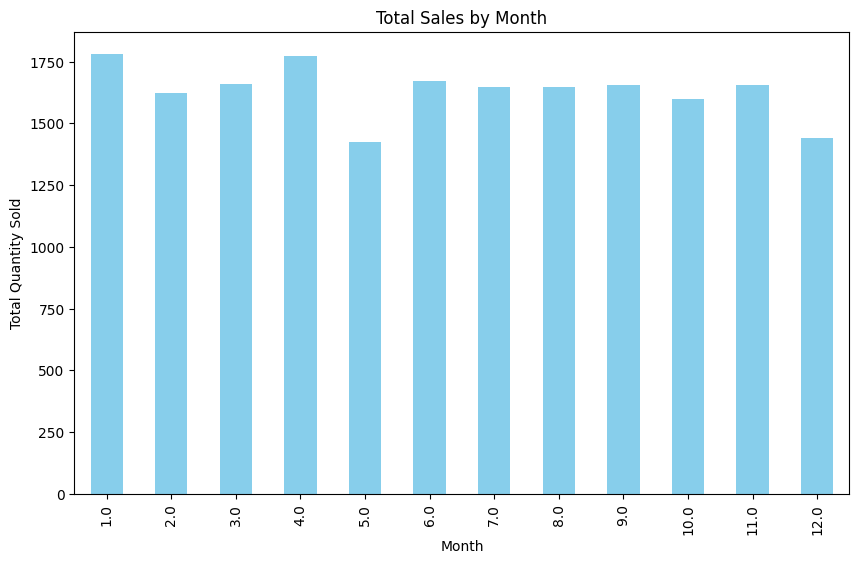


Monthly Sales Trend:
 - The highest sales occurred in month 1.0 with 1782 units sold.
 - The lowest sales occurred in month 5.0 with 1427 units sold.
 - There is no strong seasonal pattern in sales.

Sales Trend by Day of Month:


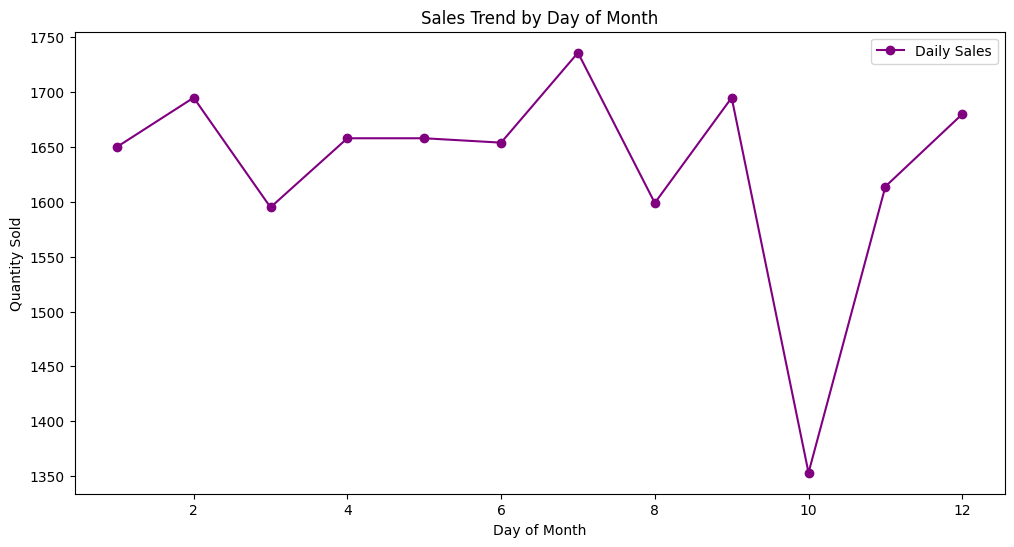


Sales Trend by Day of Month Analysis:
 - Sales vary throughout the month, with noticeable peaks and troughs.
 - The highest sales occur on day 7.0 with 1736 units sold.
 - The lowest sales occur on day 10.0 with 1353 units sold.
 - This pattern may reflect end-of-month promotions or other factors influencing sales.

Sales Trend by Hour of Day:


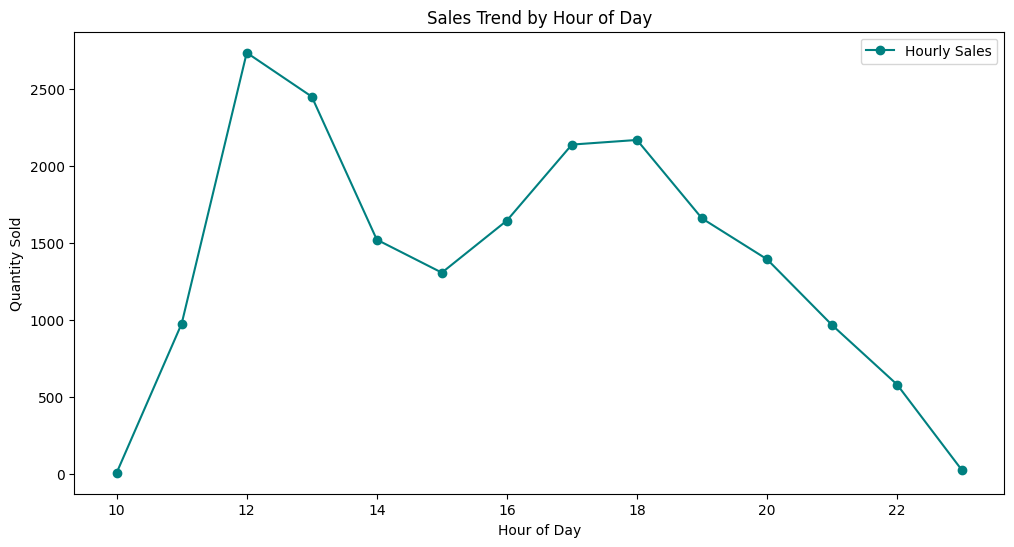


Sales Trend by Hour of Day Analysis:
 - Sales vary significantly by hour of the day, with peak hours showing higher quantities sold.
 - The highest sales occur at hour 12.0 with 2735 units sold.
 - The lowest sales occur at hour 10.0 with 10 units sold.
 - This pattern can help in optimizing staffing and inventory levels based on expected sales.

Heatmap of Average Sales by Hour and Day:


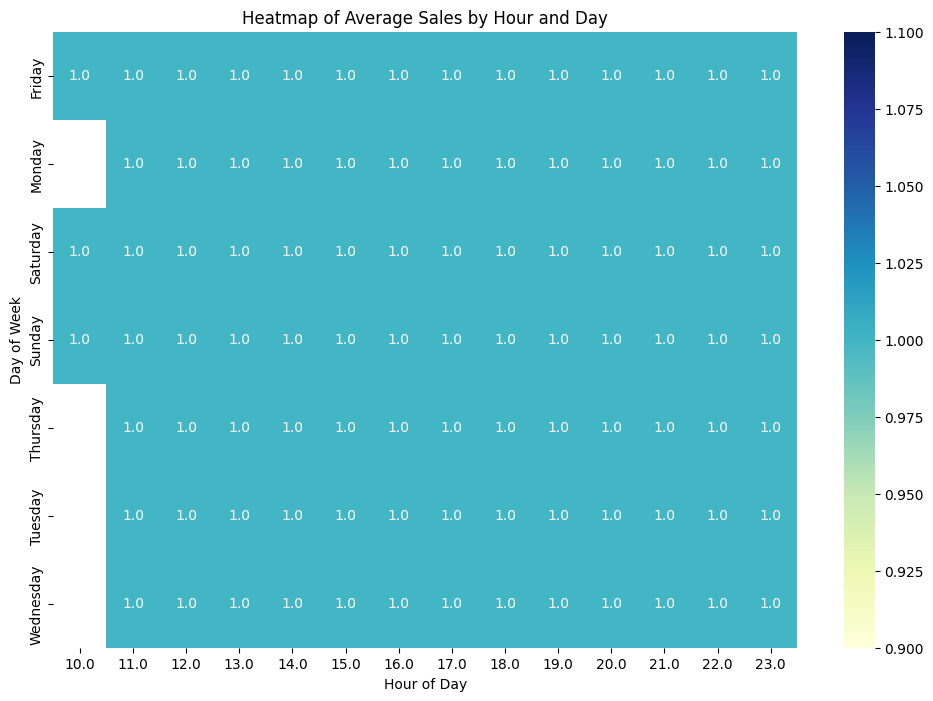


Heatmap of Average Sales by Hour and Day Analysis:
 - The heatmap shows how average sales vary across different days of the week and hours of the day.
 - Peak sales hours and days are indicated by darker colors.
 - This visualization helps identify optimal times for promotions and staffing.
Preprocessed data saved to D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed_Pizza_Sales.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Pizza_Sale - pizza_sales.csv")

# ===============================
# Filling Missing Values
# ===============================
print("\nFilling Missing Values:")
missing_before = data.isnull().sum()
print("Missing values before filling:\n", missing_before)

# List of columns with missing values
columns_with_missing_values = ['pizza_name_id', 'total_price', 'pizza_category', 'pizza_ingredients', 'pizza_name']

# Function to fill missing values in the specified column using other columns
def fill_missing_values(data, column_to_fill, reference_columns):
    for idx, row in data[data[column_to_fill].isnull()].iterrows():
        ref_values = row[reference_columns]
        matching_row = data[(data[reference_columns] == ref_values).all(axis=1) & data[column_to_fill].notnull()]
        if not matching_row.empty:
            data.at[idx, column_to_fill] = matching_row[column_to_fill].values[0]

# Apply the function to each column with missing values
for column in columns_with_missing_values:
    ref_columns = [col for col in columns_with_missing_values if col != column]
    fill_missing_values(data, column, ref_columns)

# Check the number of missing values after filling
missing_after = data.isnull().sum()
print("Missing values after filling:\n", missing_after)

# Converting 'order_date' and 'order_time' to datetime
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S', errors='coerce').dt.time

# Combine 'order_date' and 'order_time' into a single datetime column
data['order_datetime'] = pd.to_datetime(data['order_date'].astype(str) + ' ' + data['order_time'].astype(str), errors='coerce')

# Extract date and time features
data['day_of_month'] = data['order_datetime'].dt.day
data['day_of_week'] = data['order_datetime'].dt.day_name()
data['hour_of_day'] = data['order_datetime'].dt.hour
data['month_of_year'] = data['order_datetime'].dt.month_name()
data['weekend'] = data['order_datetime'].dt.dayofweek >= 5  # True for Saturday and Sunday

#### Handling Outlier Section ####

# ==========================================
# Outliers using Winsorization method
# ==========================================

from scipy.stats.mstats import winsorize

def winsorize_outliers(df, columns, lower_percentile=0.01, upper_percentile=0.99):
    for col in columns:
        if df[col].dtype != 'object':  # Only apply to numerical columns
            original_size = len(df)
            df[col] = winsorize(df[col], limits=[lower_percentile, upper_percentile])  # Winsorize data
            print(f" - Winsorized outliers in {col} using Winsorization method")
    return df

# Applying Winsorization method for outlier treatment
numerical_columns = ['quantity', 'unit_price', 'total_price']
data = winsorize_outliers(data, numerical_columns)


# ===============================
# Duplicate Records Removal
# ===============================
print(f"\nNumber of Duplicate Rows Before Removal: {len(data[data.duplicated()])}")

# Remove duplicate rows
data.drop_duplicates(inplace=True)

print(f"Number of Duplicate Rows After Removal: {len(data[data.duplicated()])}")

#### EDA Section ####
# (The rest of your code remains unchanged below this)

# ===============================
# Distribution Analysis for Categorical Variables
# ===============================
categorical_columns = ['pizza_id', 'pizza_name_id', 'pizza_size', 'pizza_category']

for col in categorical_columns:
    if col in data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=data, order=data[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()
    
        print(f"\nDistribution analysis for {col}:")
        print(f" - There are {data[col].nunique()} unique values in {col}.")
        print(f" - The most frequent value is '{data[col].mode()[0]}' with {data[col].value_counts().iloc[0]} occurrences.")
        print(f" - The distribution is {'skewed' if data[col].value_counts().iloc[0] / len(data) > 0.5 else 'balanced'}.")

# ===============================
# Distribution Analysis for Numerical Variables
# ===============================
for col in numerical_columns:
    if col in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()
    
        print(f"\nDistribution analysis for {col}:")
        print(f" - Mean: {data[col].mean()}")
        print(f" - Median: {data[col].median()}")
        print(f" - The distribution {'has a skew' if abs(data[col].skew()) > 0.5 else 'is fairly normal'}. Skewness: {data[col].skew()}.")

# ===============================
# Correlation Analysis
# ===============================
if all(col in data.columns for col in numerical_columns):
    corr_matrix = data[numerical_columns].corr()
    print("\nCorrelation Matrix:\n", corr_matrix)

    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap for Numerical Variables")
    plt.show()

    print("\nCorrelation Analysis:")
    for col in numerical_columns:
        if col in corr_matrix.columns:
            high_corr = corr_matrix[col][corr_matrix[col] > 0.7].drop(col, errors='ignore')
            if len(high_corr) > 0:
                print(f" - '{col}' is highly correlated with {', '.join(high_corr.index)} (correlation > 0.7).")
            else:
                print(f" - '{col}' has no strong correlations with other numerical variables.")
        else:
            print(f" - '{col}' column is missing in the correlation matrix.")
else:
    print("One or more numerical columns are missing in the dataset.")


# ===============================
# Time Series Analysis
# ===============================
if 'order_date' in data.columns:
    data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')
    invalid_dates = data[data['order_date'].isnull()]
    print(f"\nNumber of Invalid Dates: {len(invalid_dates)}")

    sales_by_date = data.groupby('order_date')['quantity'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(sales_by_date, label='Daily Sales')
    plt.title("Sales Over Time")
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.show()

    print("\nTime Series Analysis of Sales Over Time:")
    print(f" - Total number of sales records: {len(sales_by_date)}")
    print(f" - Sales peaks around certain dates, which could indicate promotions or seasonal trends.")
    print(f" - There {'is' if sales_by_date.diff().std() > 10 else 'is no'} significant volatility in daily sales.")

    data['Month'] = data['order_date'].dt.month
    monthly_sales = data.groupby('Month')['quantity'].sum()

    plt.figure(figsize=(10, 6))
    monthly_sales.plot(kind='bar', color='skyblue')
    plt.title("Total Sales by Month")
    plt.xlabel("Month")
    plt.ylabel("Total Quantity Sold")
    plt.show()

    print("\nMonthly Sales Trend:")
    print(f" - The highest sales occurred in month {monthly_sales.idxmax()} with {monthly_sales.max()} units sold.")
    print(f" - The lowest sales occurred in month {monthly_sales.idxmin()} with {monthly_sales.min()} units sold.")
    print(f" - There is {'clear seasonality' if monthly_sales.max() > 1.5 * monthly_sales.mean() else 'no strong seasonal pattern'} in sales.")

# ===============================
# Additional Analysis
# ===============================
# Sales Trend by Day of Month
print("\nSales Trend by Day of Month:")
plt.figure(figsize=(12, 6))
data['day_of_month'] = data['order_date'].dt.day
sales_by_day = data.groupby('day_of_month')['quantity'].sum()
plt.plot(sales_by_day, label='Daily Sales', marker='o', color='purple')
plt.title('Sales Trend by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

print("\nSales Trend by Day of Month Analysis:")
print(f" - Sales vary throughout the month, with noticeable peaks and troughs.")
print(f" - The highest sales occur on day {sales_by_day.idxmax()} with {sales_by_day.max()} units sold.")
print(f" - The lowest sales occur on day {sales_by_day.idxmin()} with {sales_by_day.min()} units sold.")
print(f" - This pattern may reflect end-of-month promotions or other factors influencing sales.")

# Sales Trend by Hour of Day
print("\nSales Trend by Hour of Day:")
plt.figure(figsize=(12, 6))
sales_by_hour = data.groupby('hour_of_day')['quantity'].sum()
plt.plot(sales_by_hour, label='Hourly Sales', marker='o', color='teal')
plt.title('Sales Trend by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()

print("\nSales Trend by Hour of Day Analysis:")
print(f" - Sales vary significantly by hour of the day, with peak hours showing higher quantities sold.")
print(f" - The highest sales occur at hour {sales_by_hour.idxmax()} with {sales_by_hour.max()} units sold.")
print(f" - The lowest sales occur at hour {sales_by_hour.idxmin()} with {sales_by_hour.min()} units sold.")
print(f" - This pattern can help in optimizing staffing and inventory levels based on expected sales.")

# Heatmap of Average Sales by Hour and Day
print("\nHeatmap of Average Sales by Hour and Day:")
plt.figure(figsize=(12, 8))
heatmap_data = data.groupby(['day_of_week', 'hour_of_day'])['quantity'].mean().unstack()
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Heatmap of Average Sales by Hour and Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

print("\nHeatmap of Average Sales by Hour and Day Analysis:")
print(f" - The heatmap shows how average sales vary across different days of the week and hours of the day.")
print(f" - Peak sales hours and days are indicated by darker colors.")
print(f" - This visualization helps identify optimal times for promotions and staffing.")

# ===============================
# Preprocessing
# ===============================


# Drop 'order_date' and 'order_time' columns as they are no longer needed
data.drop(columns=['order_date', 'order_time'], inplace=True, errors='ignore')

# Convert month names to numbers
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data['month_of_year'] = data['month_of_year'].map(month_mapping)

# Convert day names to numbers
day_mapping = {
    'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4,
    'Thursday': 5, 'Friday': 6, 'Saturday': 7
}
data['day_of_week'] = data['day_of_week'].map(day_mapping)

# Label Encoding categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['pizza_name_id', 'pizza_category', 'pizza_size', 'pizza_ingredients', 'pizza_name', 'weekend']

for col in categorical_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col].astype(str))

# Save preprocessed data for modeling
output_file = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed_Pizza_Sales.csv"
data.to_csv(output_file, index=False)
print(f"Preprocessed data saved to {output_file}")

In [35]:
import pandas as pd

# Step 1: Read the existing CSV file
# Replace 'path_to_existing_csv.csv' with the path to your existing CSV file
df = pd.read_csv(r'D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed_Pizza_Sales_WI.csv')

# Step 2: Specify the columns you want to include in the new CSV file
columns_to_include = ['quantity', 'pizza_name_id','order_datetime']  # Example columns

# Step 3: Filter the DataFrame to include only the specified columns
filtered_df = df[columns_to_include]

# Step 4: Write the filtered DataFrame to a new CSV file
# Replace 'path_to_new_csv.csv' with the path where you want to save the new CSV file
filtered_df.to_csv(r'D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed_features.csv', index=False)

print("New CSV file created successfully!")


#Columns: [pizza_id, order_id, pizza_name_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name, order_datetime, day_of_month, day_of_week, hour_of_day, month_of_year, weekend]

New CSV file created successfully!


Feature Selection

Exploratory Data Analysis (EDA)

Data Preparation

 ARIMA Model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3231.819, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2404.847, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2935.370, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2361.178, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.38 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2265.853, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2268.448, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2266.341, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2265.042, Time=0.31 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2785.563, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2265.081, Time=0.48 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2690.861, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2255.5

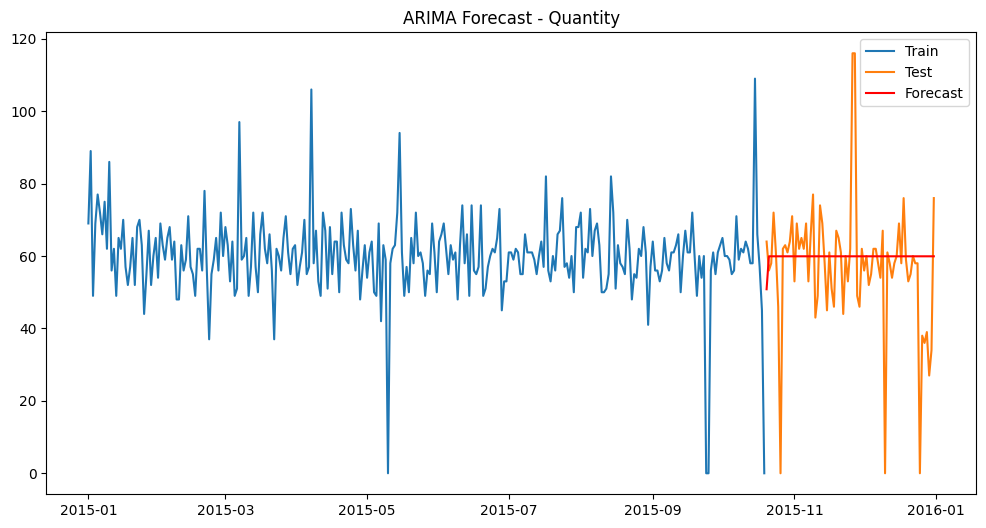

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from pmdarima import auto_arima

# Load dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed.csv", 
                 parse_dates=['order_datetime'], 
                 index_col='order_datetime')

# Sort index and remove duplicates
df = df.sort_index()
df = df[~df.index.duplicated(keep='first')]

# Resample to daily frequency, sum quantities, and handle missing values
df_daily = df['quantity'].resample('D').sum().fillna(0)

# Set the frequency explicitly to avoid warnings
df_daily.index.freq = 'D'

# Split into train and test sets
train_size = int(0.8 * len(df_daily))
train = df_daily[:train_size]
test = df_daily[train_size:]

# Use auto_arima to tune the (p, d, q) parameters
auto_model = auto_arima(train, seasonal=False, trace=True, stepwise=True)
print(auto_model.summary())

# Forecast using the auto_arima model
forecast = auto_model.predict(n_periods=len(test))

# Ensure the forecast index matches the test index
forecast_index = test.index
forecast_series = pd.Series(forecast, index=forecast_index)

# Evaluate MAPE
mape = mean_absolute_percentage_error(test, forecast_series)
print(f'ARIMA MAPE: {mape:.4f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_series, label='Forecast', color='red')
plt.title('ARIMA Forecast - Quantity')
plt.legend()
plt.show()


SARIMA Model

SARIMA MAPE: 2.5329769205490856e+16


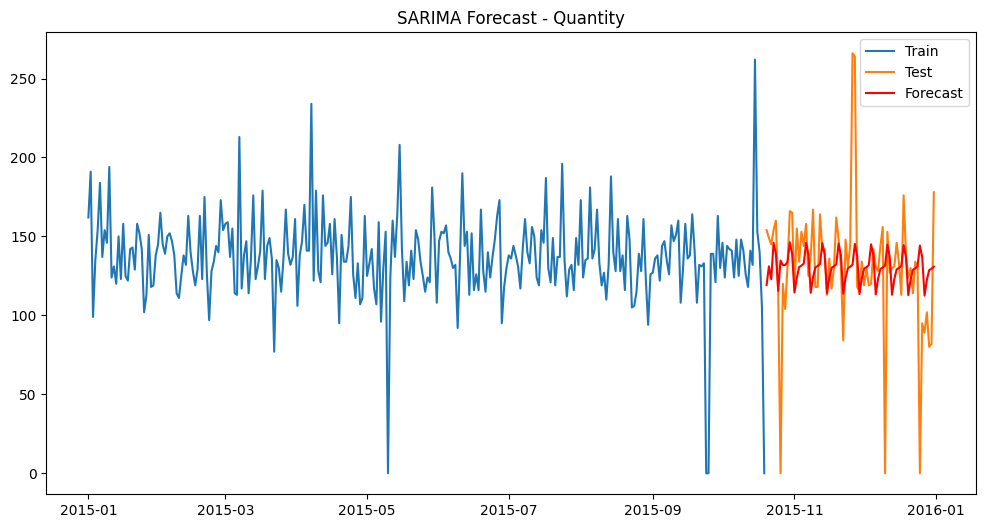

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error

# Load dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed.csv", parse_dates=['order_datetime'], index_col='order_datetime')

# Resample to daily frequency and sum up quantity
df_daily = df['quantity'].resample('D').sum()

# Split into train and test sets
train = df_daily[:int(0.8 * len(df_daily))]
test = df_daily[int(0.8 * len(df_daily)):]

# Train SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))  # Orders can be tuned
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Evaluate
mape = mean_absolute_percentage_error(test, forecast)
print(f'SARIMA MAPE: {mape}')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast - Quantity')
plt.legend()
plt.show()


Prophet Model

c:\Users\sripathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:54:44 - cmdstanpy - INFO - Chain [1] start processing
21:54:54 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAPE: 2.4675664697244744e+16


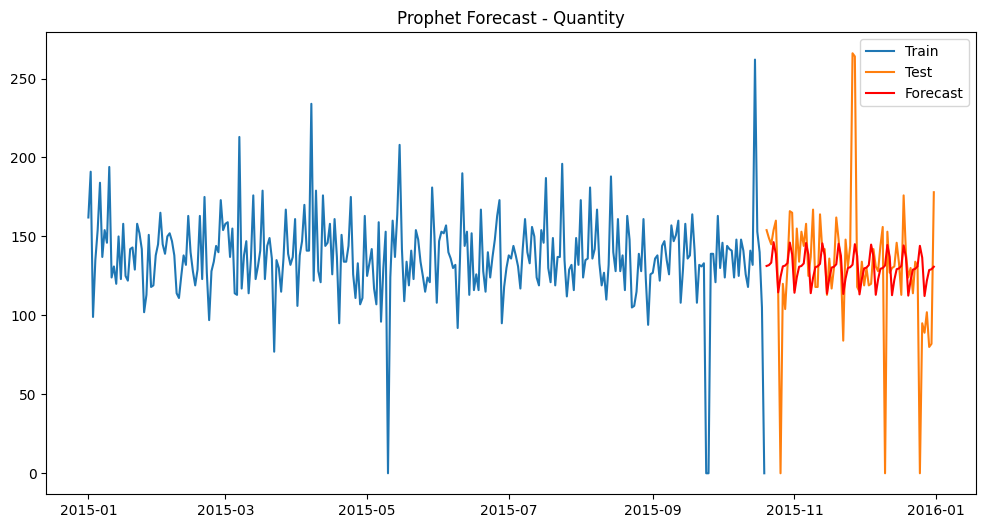

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

# Load dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed.csv", parse_dates=['order_datetime'])

# Prepare data for Prophet
df_prophet = df[['order_datetime', 'quantity']].rename(columns={'order_datetime': 'ds', 'quantity': 'y'})
df_prophet = df_prophet.set_index('ds').resample('D').sum().reset_index()

# Split into train and test sets
train = df_prophet[:int(0.8 * len(df_prophet))]
test = df_prophet[int(0.8 * len(df_prophet)):]

# Train Prophet model
model = Prophet()
model.fit(train)

# Forecast
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)
forecasted_values = forecast['yhat'][-len(test):].values

# Evaluate
mape = mean_absolute_percentage_error(test['y'], forecasted_values)
print(f'Prophet MAPE: {mape}')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test')
plt.plot(test['ds'], forecasted_values, label='Forecast', color='red')
plt.title('Prophet Forecast - Quantity')
plt.legend()
plt.show()


LSTM Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error

# Load dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed_Pizza_Sales.csv", parse_dates=['order_datetime'], index_col='order_datetime')

# Resample to daily frequency and sum up quantity
df_daily = df['quantity'].resample('D').sum()

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_daily.values.reshape(-1, 1))

# Create dataset with lookback
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X, y = create_dataset(scaled_data, look_back)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Forecast
predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
mape = mean_absolute_percentage_error(y_test, predicted)
print(f'LSTM MAPE: {mape}')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index[-len(y_test):], y_test, label='Test')
plt.plot(df_daily.index[-len(y_test):], predicted, label='Forecast', color='red')
plt.title('LSTM Forecast - Quantity')
plt.legend()
plt.show()


Regression Model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Load dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed_Pizza_Sales.csv", parse_dates=['order_datetime'], index_col='order_datetime')

# Resample to daily frequency and sum up quantity
df_daily = df['quantity'].resample('D').sum()

# Create features and target
df_reg = df_daily.reset_index()
df_reg['day_of_week'] = df_reg['order_datetime'].dt.dayofweek
df_reg['day_of_month'] = df_reg['order_datetime'].dt.day
df_reg['month'] = df_reg['order_datetime'].dt.month
X = df_reg[['day_of_week', 'day_of_month', 'month']]
y = df_reg['quantity']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast
forecast = model.predict(X_test)

# Evaluate
mape = mean_absolute_percentage_error(y_test, forecast)
print(f'Regression MAPE: {mape}')

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_reg['order_datetime'][-len(y_test):], y_test, label='Test')
plt.plot(df_reg['order_datetime'][-len(y_test):], forecast, label='Forecast', color='red')
plt.title('Regression Forecast - Quantity')
plt.legend()
plt.show()


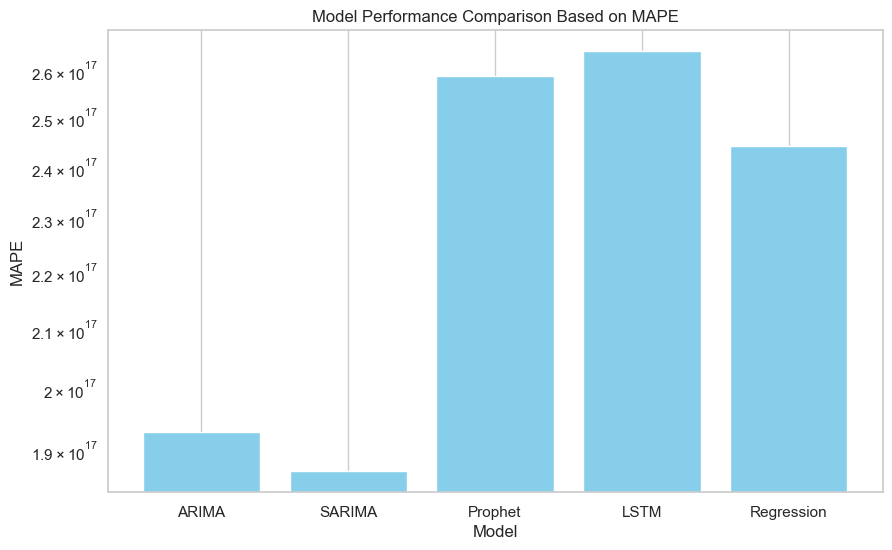

In [47]:
import matplotlib.pyplot as plt

# MAPE results
results = {
    'ARIMA': 1.928973916023163e+17,
    'SARIMA': 1.8681746092494336e+17,
    'Prophet': 2.5889259027684288e+17,
    'LSTM': 2.6413070730918458e+17,
    'Regression': 2.443684663378136e+17
}

# Plot MAPE values
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.title('Model Performance Comparison Based on MAPE')
plt.yscale('log')  # Using logarithmic scale to better visualize large differences
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Load the dataset
data = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Pizza_Sale - pizza_sales.csv")

# 2. Fill missing values
missing_before = data.isnull().sum()
print("Missing values before filling:\n", missing_before)

# List of columns with missing values
columns_with_missing_values = ['pizza_name_id', 'total_price', 'pizza_category', 'pizza_ingredients', 'pizza_name']

def fill_missing_values(data, column_to_fill, reference_columns):
    for idx, row in data[data[column_to_fill].isnull()].iterrows():
        ref_values = row[reference_columns]
        matching_row = data[(data[reference_columns] == ref_values).all(axis=1) & data[column_to_fill].notnull()]
        if not matching_row.empty:
            data.at[idx, column_to_fill] = matching_row[column_to_fill].values[0]

for column in columns_with_missing_values:
    ref_columns = [col for col in columns_with_missing_values if col != column]
    fill_missing_values(data, column, ref_columns)

missing_after = data.isnull().sum()
print("Missing values after filling:\n", missing_after)

# 3. Convert 'order_date' and 'order_time' to consistent datetime format
def parse_date(date_str):
    for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

data['order_date'] = data['order_date'].apply(parse_date)
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S', errors='coerce').dt.time

# Combine 'order_date' and 'order_time' into a single datetime column
data['order_datetime'] = pd.to_datetime(data['order_date'].astype(str) + ' ' + data['order_time'].astype(str), errors='coerce')

# Extract date and time features
data['day_of_month'] = data['order_datetime'].dt.day
data['day_of_week'] = data['order_datetime'].dt.day_name()
data['hour_of_day'] = data['order_datetime'].dt.hour
data['month_of_year'] = data['order_datetime'].dt.month_name()

# 4. Remove duplicates
data = data.drop_duplicates()

# 5. Remove outliers
def remove_outliers(df, column_name):
    z_scores = np.abs(stats.zscore(df[column_name].dropna()))
    df = df[(z_scores < 3)]
    return df

# Assuming 'total_price' might have outliers
data = remove_outliers(data, 'total_price')

# Save the preprocessed data as CSV
data.to_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed.csv", index=False)

# Display basic statistics
print(data.describe())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load the dataset
data = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Pizza_Sale - pizza_sales.csv")

# Copy data for EDA before transformation
eda_data = data.copy()

# Perform necessary preprocessing before EDA
# 2. Convert 'order_date' and 'order_time' to consistent datetime format
def parse_date(date_str):
    for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

data['order_date'] = data['order_date'].apply(parse_date)
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S', errors='coerce').dt.time

# Combine 'order_date' and 'order_time' into a single datetime column
data['order_datetime'] = pd.to_datetime(data['order_date'].astype(str) + ' ' + data['order_time'].astype(str), errors='coerce')

# Extract date and time features
data['day_of_month'] = data['order_datetime'].dt.day
data['day_of_week'] = data['order_datetime'].dt.day_name()
data['hour_of_day'] = data['order_datetime'].dt.hour
data['month_of_year'] = data['order_datetime'].dt.month_name()

# Add 'weekend' column
data['weekend'] = data['order_datetime'].dt.dayofweek >= 5  # True for Saturday and Sunday

# 3. Fill missing values
missing_before = data.isnull().sum()
print("Missing values before filling:\n", missing_before)

# List of columns with missing values
columns_with_missing_values = ['pizza_name_id', 'total_price', 'pizza_category', 'pizza_ingredients', 'pizza_name']

# Function to fill missing values in the specified column using other columns
def fill_missing_values(data, column_to_fill, reference_columns):
    for idx, row in data[data[column_to_fill].isnull()].iterrows():
        ref_values = row[reference_columns]
        matching_row = data[(data[reference_columns] == ref_values).all(axis=1) & data[column_to_fill].notnull()]
        if not matching_row.empty:
            data.at[idx, column_to_fill] = matching_row[column_to_fill].values[0]

# Apply the function to each column with missing values
for column in columns_with_missing_values:
    ref_columns = [col for col in columns_with_missing_values if col != column]
    fill_missing_values(data, column, ref_columns)

# Check the number of missing values after filling
missing_after = data.isnull().sum()
print("Missing values after filling:\n", missing_after)

# 4. Remove duplicates
data = data.drop_duplicates()

# 5. Define pizza types based on unique names
pizza_type_mapping = {
    'The Hawaiian Pizza': 'Non-Veg',
    'The Classic Deluxe Pizza': 'Veg',
    'The Five Cheese Pizza': 'Veg',
    'The Italian Supreme Pizza': 'Mixed',
    'The Mexicana Pizza': 'Mixed',
    'The Thai Chicken Pizza': 'Non-Veg',
    'The Prosciutto and Arugula Pizza': 'Non-Veg',
    'The Barbecue Chicken Pizza': 'Non-Veg',
    'The Greek Pizza': 'Mixed',
    'The Spinach Supreme Pizza': 'Veg',
    'The Green Garden Pizza': 'Veg',
    'The Italian Capocollo Pizza': 'Mixed',
    'The Spicy Italian Pizza': 'Mixed',
    'The Spinach Pesto Pizza': 'Veg',
    'The Vegetables + Vegetables Pizza': 'Veg',
    'The Southwest Chicken Pizza': 'Non-Veg',
    'The California Chicken Pizza': 'Non-Veg',
    'The Pepperoni Pizza': 'Non-Veg',
    'The Chicken Pesto Pizza': 'Non-Veg',
    'The Big Meat Pizza': 'Non-Veg',
    'The Soppressata Pizza': 'Non-Veg',
    'The Four Cheese Pizza': 'Veg',
    'The Napolitana Pizza': 'Veg',
    'The Calabrese Pizza': 'Non-Veg',
    'The Italian Vegetables Pizza': 'Veg',
    'The Mediterranean Pizza': 'Veg',
    'The Pepper Salami Pizza': 'Non-Veg',
    'The Spinach and Feta Pizza': 'Veg',
    'The Sicilian Pizza': 'Non-Veg',
    'The Chicken Alfredo Pizza': 'Non-Veg',
    'The Pepperoni, Mushroom, and Peppers Pizza': 'Non-Veg',
    'The Brie Carre Pizza': 'Veg'
}

# Strip any leading/trailing whitespace from pizza names
data['pizza_name'] = data['pizza_name'].str.strip()

# Map pizza types
data['pizza_type'] = data['pizza_name'].map(pizza_type_mapping)

# Replace NaN values in 'pizza_type' with a default value if needed
data['pizza_type'].fillna('Unknown', inplace=True)

# 6. Remove outliers
def remove_outliers(df, column_name):
    if column_name in df.columns:
        z_scores = np.abs(stats.zscore(df[column_name].dropna()))
        df = df[(z_scores < 3)]
    return df

# Assuming 'total_price' might be a column with outliers
data = remove_outliers(data, 'total_price')

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

data['season'] = data['month_of_year'].apply(lambda x: get_season(pd.to_datetime(x, format='%B').month))

# Define meal times
def get_meal_time(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

data['meal_time'] = data['hour_of_day'].apply(get_meal_time)

# Define promotional periods for 2015, excluding weekends
promotional_periods = {
    'New Year': pd.date_range(start='2014-12-31', end='2015-01-01'),
    'Republic Day': pd.date_range(start='2015-01-26', end='2015-01-26'),
    'Valentine\'s Day': pd.date_range(start='2015-02-14', end='2015-02-14'),
    'Holi': pd.date_range(start='2015-03-05', end='2015-03-06'),
    'Eid-ul-Fitr': pd.date_range(start='2015-07-17', end='2015-07-17'),
    'Independence Day': pd.date_range(start='2015-08-15', end='2015-08-15'),
    'Ganesh Chaturthi': pd.date_range(start='2015-09-17', end='2015-09-17'),
    'Diwali': pd.date_range(start='2015-11-11', end='2015-11-11'),
    'Christmas': pd.date_range(start='2015-12-25', end='2015-12-25'),
    'New Year\'s Eve': pd.date_range(start='2015-12-31', end='2015-12-31')
}

# Initialize the 'promotional_periods' column with 'No'
data['promotional_periods'] = 'No'

# Update the 'promotional_periods' column to 'Yes' for dates in promotional periods, excluding weekends
for period, dates in promotional_periods.items():
    if dates is not None:
        # Exclude weekends from the promotional dates
        dates = dates[~dates.to_series().dt.dayofweek.isin([5, 6])]  # 5: Saturday, 6: Sunday
        
        # Check if the index date is in the list of promotional dates
        data.loc[data['order_date'].isin(dates), 'promotional_periods'] = 'Yes'

# Define weekly promotional periods
def get_week_start_end(date):
    week_start = date - pd.to_timedelta(date.weekday(), unit='d')
    week_end = week_start + pd.to_timedelta(6, unit='d')
    return week_start, week_end

# Update the 'promotional_periods' column to 'Yes' for weeks with promotional periods
for period, dates in promotional_periods.items():
    if dates is not None:
        for date in dates:
            week_start, week_end = get_week_start_end(date)
            # Exclude weekends from the promotional period
            week_dates = pd.date_range(start=week_start, end=week_end)
            week_dates = week_dates[~week_dates.to_series().dt.dayofweek.isin([5, 6])]  # 5: Saturday, 6: Sunday
            
            # Check if 'order_date' is in the list of weekly promotional dates
            data.loc[data['order_date'].isin(week_dates), 'promotional_periods'] = 'Yes'
# Now, you have the 'data' for further encoding/scaling and 'eda_data' for EDA purposes

#### EDA Section ####

# 2. Perform EDA on raw data (eda_data)

print("First few rows of the dataset:\n", eda_data.head())
print("\nBasic info about the dataset:")
print(eda_data.info())
print("\nSummary statistics for numerical columns:")
print(eda_data.describe())

# Distribution of total_price
print("\nDistribution of Total Price:")
plt.figure(figsize=(10, 6))
sns.histplot(data['total_price'], bins=30, kde=True)
plt.title('Distribution of Total Price')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

# Distribution of quantity
print("\nDistribution of Quantity:")
plt.figure(figsize=(10, 6))
sns.histplot(data['quantity'], bins=10, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Distribution of pizza types
print("\nDistribution of Pizza Types:")
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='pizza_type', order=data['pizza_type'].value_counts().index)
plt.title('Distribution of Pizza Types')
plt.xlabel('Pizza Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of pizza categories
print("\nDistribution of Pizza Categories:")
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='pizza_category', order=data['pizza_category'].value_counts().index)
plt.title('Distribution of Pizza Categories')
plt.xlabel('Pizza Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of seasons
print("\nDistribution of Seasons:")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='season', order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

# Distribution of meal times
print("\nDistribution of Meal Times:")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='meal_time', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Distribution of Meal Times')
plt.xlabel('Meal Time')
plt.ylabel('Count')
plt.show()

# Distribution of promotional periods
print("\nDistribution of Promotional Periods:")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='promotional_periods')
plt.title('Distribution of Promotional Periods')
plt.xlabel('Promotional Period')
plt.ylabel('Count')
plt.show()

# Total price by day of week
print("\nTotal Price by Day of Week:")
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='day_of_week', y='total_price', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Total Price by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()

# Total price by month
print("\nTotal Price by Month:")
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='month_of_year', y='total_price', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Total Price by Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.show()

# Total price by hour of day
print("\nAverage Total Price by Hour of Day:")
plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x='hour_of_day', y='total_price', estimator='mean', marker='o')
plt.title('Average Total Price by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Total Price')
plt.show()

# Total price by weekend vs. weekday
print("\nTotal Price by Weekend vs. Weekday:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='weekend', y='total_price')
plt.title('Total Price by Weekend vs. Weekday')
plt.xlabel('Weekend')
plt.ylabel('Total Price')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

# Correlation matrix for numerical features
print("\nCorrelation Matrix for Numerical Features:")
plt.figure(figsize=(10, 8))
correlation_matrix = data[['quantity', 'unit_price', 'total_price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Boxplot to identify outliers in total_price
print("\nBoxplot of Total Price:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='total_price')
plt.title('Boxplot of Total Price')
plt.xlabel('Total Price')
plt.show()

#### Encoding and Scaling Section ####

# Proceed with encoding and scaling for machine learning purposes

#### Encoding and Scaling Section ####

# 1. Convert month names to numbers (January -> 1, February -> 2, etc.)
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data['month_of_year'] = data['month_of_year'].map(month_mapping)

# 2. Convert day names to numbers (Sunday -> 1, Monday -> 2, etc.)
day_mapping = {
    'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4,
    'Thursday': 5, 'Friday': 6, 'Saturday': 7
}
data['day_of_week'] = data['day_of_week'].map(day_mapping)

# 3. Set 'order_datetime' as index and drop 'order_date' and 'order_time' columns
data.set_index('order_datetime', inplace=True)
data.drop(columns=['order_date', 'order_time'], inplace=True)

# 4. Label Encoding categorical variables
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = [
    'pizza_name_id', 'pizza_category', 'pizza_size', 'pizza_ingredients',
    'pizza_name', 'pizza_type', 'day_of_week', 'month_of_year',
    'season', 'meal_time', 'promotional_periods', 'weekend'
]

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# 5. Standard Scaling of numerical columns
scaler = StandardScaler()
numerical_columns = ['total_price', 'unit_price', 'day_of_month', 'hour_of_day']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 6. Save preprocessed data for modeling
output_file = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Preprocessed_Pizza_Sales.csv"
data.to_csv(output_file)
print(f"Preprocessed data saved to {output_file}")


# Now you have EDA done on raw data and preprocessing done separately for modeling.


In [ ]:
# Drop 'order_datetime' column and any other columns that are no longer needed
data.drop(columns=['order_date', 'order_time', 'order_datetime'], inplace=True, errors='ignore')
